<a href="https://colab.research.google.com/github/knattarina/wildfire_challenge/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os

from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.backend import square, mean

TEST_DATA_SIZE = 90

In [24]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Wildfire_Challenge/Data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##### IMPORT DATA #####

forecasts_df = pd.read_csv('Cleansed_Forecasts.csv')
df = pd.read_csv('Cleansed_Data.csv')

forecasts_df['Date'] = pd.to_datetime(forecasts_df['Date'])
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
columns = ['Date', 'Region', 'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',	'Mean_confidence']

df_region = df[df['Region'] == 'QL'].copy()
df_region.drop(columns = ['Date', 'Region'], inplace = True)
df_region

,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,SoilWaterContent_Max,SoilWaterContent_Mean,SoilWaterContent_Min,SoilWaterContent_Variance,SolarRadiation_Max,SolarRadiation_Mean,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance,Month,Year,Shrubs,Herbaceous vegetation,Cultivated and managed vegetation/agriculture (cropland),Urban / built up,Bare / sparse vegetation,Permanent water bodies,Herbaceous wetland,"Closed forest, evergreen, broad leaf","Closed forest, deciduous broad leaf","Closed forest, unknown","Open forest, evergreen broad leaf","Open forest, deciduous broad leaf","Open forest, unknown definitions",Open sea,count()[unit: km^2]
11563,38.831579,322.197368,45.757895,83.315789,74.452164,1.453053,0.0,35.641257,95.898270,47.959364,14.443199,403.134377,0.472416,0.185641,0.000000e+00,0.012679,31.982830,27.056979,6.033827,29.500832,37.047943,28.842866,20.951620,13.792599,7.675632,3.483753,1.106028,0.883048,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
11564,64.464286,315.991071,58.492857,86.785714,87.775497,1.544607,0.0,36.370861,95.837463,48.593844,19.908998,418.233850,0.477548,0.177612,0.000000e+00,0.011915,31.729107,26.276294,4.372402,27.100196,35.675449,29.416449,21.426340,10.519515,7.094274,3.145954,0.900613,0.951232,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
11565,47.386585,333.092683,69.860976,88.634146,55.630913,3.307646,0.0,55.229505,97.793060,54.993082,23.762615,321.556066,0.474464,0.180547,0.000000e+00,0.009789,31.707254,25.261123,3.596726,20.015944,35.998322,29.837556,23.180372,7.215216,7.156260,3.376279,0.678431,1.197812,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
11566,30.100000,315.216667,31.395833,89.458333,73.792183,7.174250,0.0,115.028624,96.219215,68.853479,32.426708,158.471173,0.490053,0.221695,4.041164e-07,0.010189,30.015615,19.133625,5.608485,29.837734,31.970034,27.344346,23.165539,3.151807,9.109385,3.087130,0.907614,1.030539,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
11567,4.000000,326.412500,58.150000,85.750000,94.064049,11.410645,0.0,246.249524,92.610512,69.268049,20.808424,354.098274,0.511396,0.259284,8.472707e-07,0.014463,32.637787,17.328773,5.111666,43.214968,31.534004,26.426117,18.141447,7.098645,8.062080,3.159938,1.122996,1.365404,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17341,78.670769,322.305385,41.896923,87.800000,44.983952,1.769690,0.0,26.448536,93.493095,41.505174,14.769243,516.251343,0.475812,0.172762,2.327530e-07,0.009995,30.676556,25.084729,8.896174,24.536368,31.110630,23.244205,15.386983,11.972870,6.870927,2.858941,0.507665,0.656063,10,2020,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
17342,119.608649,320.891892,209.929730,87.351351,53.570747,1.598588,0.0,27.491621,88.812210,34.364756,9.392016,519.339361,0.473505,0.165709,0.000000e+00,0.010422,31.352774,28.033695,16.663504,10.204895,31.255157,23.345542,15.299400,9.130294,5.969506,3.272644,0.894660,0.684547,10,2020,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
17343,249.090625,327.207552,56.365104,88.010417,10.742613,0.076241,0.0,0.283345,85.109924,30.359122,9.449774,313.025023,0.432511,0.155046,0.000000e+00,0.008578,31.411791,29.804340,21.400858,2.610120,30.942204,24.280550,15.277708,6.382612,7.196375,2.929369,0.777750,0.845396,10,2020,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1

In [ ]:
# prepare sample data in the form of data frame with cols of timesteps (x) and values (y)  
data(AirPassengers) 
monthly_data <- unclass(AirPassengers)
months <- 1:144
DF <- data.frame(months,monthly_data)
colnames(DF)<-c("x","y")

# train an svm model, consider further tuning parameters for lower MSE
svmodel <- svm(y ~ x,data=DF, type="eps-regression",kernel="radial",cost=10000, gamma=10)
#specify timesteps for forecast, eg for all series + 12 months ahead
nd <- 1:156
#compute forecast for all the 156 months 
prognoza <- predict(svmodel, newdata=data.frame(x=nd))

#plot the results
ylim <- c(min(DF$y), max(DF$y))
xlim <- c(min(nd),max(nd))
plot(DF$y, col="blue", ylim=ylim, xlim=xlim, type="l")
par(new=TRUE)
plot(prognoza, col="red", ylim=ylim, xlim=xlim)

SyntaxError: ignored

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)
Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(epsilon=0.2))])

In [ ]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.arange(len(df))#.reshape(1, -1)#np.sort(5 * np.random.rand(40, 1), axis=0)10000*df["Date"].dt.year + 100*df["Date"].dt.month + df["Date"].dt.day #
y = df_region['count()[unit: km^2]'] #np.sin(X).ravel()#
# #############################################################################
# Add noise to targets
#y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
df_region.iloc[:1].values

#df_region

array([[3.88315790e+01, 3.22197368e+02, 4.57578947e+01, 8.33157895e+01,
        7.44521637e+01, 1.45305270e+00, 0.00000000e+00, 3.56412565e+01,
        9.58982697e+01, 4.79593642e+01, 1.44431992e+01, 4.03134377e+02,
        4.72416252e-01, 1.85641396e-01, 0.00000000e+00, 1.26788955e-02,
        3.19828300e+01, 2.70569787e+01, 6.03382683e+00, 2.95008324e+01,
        3.70479431e+01, 2.88428660e+01, 2.09516201e+01, 1.37925986e+01,
        7.67563200e+00, 3.48375331e+00, 1.10602784e+00, 8.83047607e-01,
        1.00000000e+00, 2.00500000e+03, 9.50000000e+00, 4.53000000e+01,
        1.60000000e+00, 1.00000000e-01, 1.10000000e+00, 1.00000000e-01,
        0.00000000e+00, 5.30000000e+00, 1.33000000e+01, 3.00000000e-01,
        1.00000000e-01, 1.20000000e+01, 1.10000000e+01, 3.00000000e-01,
        1.73060504e+06]])

In [ ]:
x=df_region.iloc[:,1: -1].values
y=df_region.iloc[:1].values
# to convert the one dimensional array to a two dimensional array
y=y.reshape(-1,1)

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
std_x=StandardScaler()
std_y=StandardScaler()
x2=std_x.fit_transform(x)
y2=std_y.fit_transform(y)

In [ ]:
# fitting SVR 
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(x2,y2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

Text(0, 0.5, 'Normalized Fire Area')

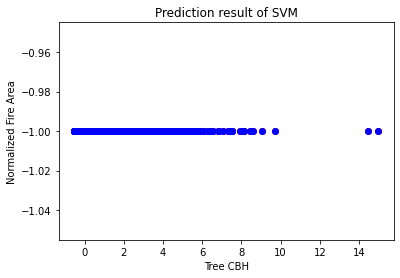

In [ ]:
# visualizing the model performance
plt.scatter(x2[:,0],y2,color='red')
plt.scatter(x2[:,0],regressor.predict(x2),color='blue')
plt.title('Prediction result of SVM')
plt.xlabel('Tree CBH')
plt.ylabel('Normalized Fire Area')

In [ ]:
df_region

,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,SoilWaterContent_Max,SoilWaterContent_Mean,SoilWaterContent_Min,SoilWaterContent_Variance,SolarRadiation_Max,SolarRadiation_Mean,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance,Month,Year,Shrubs,Herbaceous vegetation,Cultivated and managed vegetation/agriculture (cropland),Urban / built up,Bare / sparse vegetation,Permanent water bodies,Herbaceous wetland,"Closed forest, evergreen, broad leaf","Closed forest, deciduous broad leaf","Closed forest, unknown","Open forest, evergreen broad leaf","Open forest, deciduous broad leaf","Open forest, unknown definitions",Open sea,count()[unit: km^2]
11563,38.831579,322.197368,45.757895,83.315789,74.452164,1.453053,0.0,35.641257,95.898270,47.959364,14.443199,403.134377,0.472416,0.185641,0.000000e+00,0.012679,31.982830,27.056979,6.033827,29.500832,37.047943,28.842866,20.951620,13.792599,7.675632,3.483753,1.106028,0.883048,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
11564,64.464286,315.991071,58.492857,86.785714,87.775497,1.544607,0.0,36.370861,95.837463,48.593844,19.908998,418.233850,0.477548,0.177612,0.000000e+00,0.011915,31.729107,26.276294,4.372402,27.100196,35.675449,29.416449,21.426340,10.519515,7.094274,3.145954,0.900613,0.951232,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
11565,47.386585,333.092683,69.860976,88.634146,55.630913,3.307646,0.0,55.229505,97.793060,54.993082,23.762615,321.556066,0.474464,0.180547,0.000000e+00,0.009789,31.707254,25.261123,3.596726,20.015944,35.998322,29.837556,23.180372,7.215216,7.156260,3.376279,0.678431,1.197812,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
11566,30.100000,315.216667,31.395833,89.458333,73.792183,7.174250,0.0,115.028624,96.219215,68.853479,32.426708,158.471173,0.490053,0.221695,4.041164e-07,0.010189,30.015615,19.133625,5.608485,29.837734,31.970034,27.344346,23.165539,3.151807,9.109385,3.087130,0.907614,1.030539,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
11567,4.000000,326.412500,58.150000,85.750000,94.064049,11.410645,0.0,246.249524,92.610512,69.268049,20.808424,354.098274,0.511396,0.259284,8.472707e-07,0.014463,32.637787,17.328773,5.111666,43.214968,31.534004,26.426117,18.141447,7.098645,8.062080,3.159938,1.122996,1.365404,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17341,78.670769,322.305385,41.896923,87.800000,44.983952,1.769690,0.0,26.448536,93.493095,41.505174,14.769243,516.251343,0.475812,0.172762,2.327530e-07,0.009995,30.676556,25.084729,8.896174,24.536368,31.110630,23.244205,15.386983,11.972870,6.870927,2.858941,0.507665,0.656063,10,2020,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
17342,119.608649,320.891892,209.929730,87.351351,53.570747,1.598588,0.0,27.491621,88.812210,34.364756,9.392016,519.339361,0.473505,0.165709,0.000000e+00,0.010422,31.352774,28.033695,16.663504,10.204895,31.255157,23.345542,15.299400,9.130294,5.969506,3.272644,0.894660,0.684547,10,2020,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
17343,249.090625,327.207552,56.365104,88.010417,10.742613,0.076241,0.0,0.283345,85.109924,30.359122,9.449774,313.025023,0.432511,0.155046,0.000000e+00,0.008578,31.411791,29.804340,21.400858,2.610120,30.942204,24.280550,15.277708,6.382612,7.196375,2.929369,0.777750,0.845396,10,2020,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import numpy as np
%matplotlib inline

X = df.drop(columns=['Date', 'Region', 'Estimated_fire_area', 'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power', 'Mean_confidence', 'count()[unit: km^2]'])
Y = df['Estimated_fire_area'].values.tolist()

#We call the SVC method from the sklearn library which creates the necessary object for fitting
clf = svm.SVC()

#Simply fit the values of X and Y
clf.fit(X,Y)

ValueError: ignored

In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 22.2MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)
Pipeline(steps=[('standardscaler', StandardScaler()),('svr', SVR(epsilon=0.2))])

regr.predict(X)

array([0.89879962, 0.60015725, 1.02777916, 1.76565439, 0.98688327,
       0.38249427, 0.93371501, 0.04864279, 0.42862137, 0.40752888])

Automatically created module for IPython interactive environment


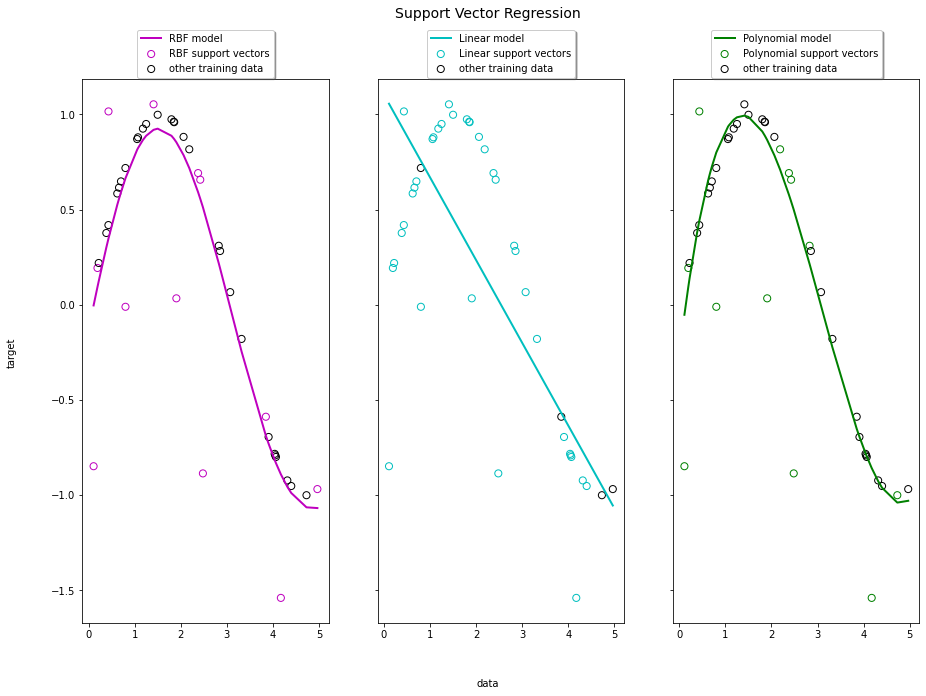

In [ ]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [ ]:
np.sort(5 * np.random.rand(40, 1), axis=0)

df_region['Estimated_fire_area'].to_numpy()

array([ 38.83157895,  64.46428571,  47.38658537, ..., 249.090625  ,
       282.5389831 , 297.6278261 ])

In [ ]:
np.sort(5 * np.random.rand(40, 1), axis=0)

array([[0.39072936],
       [0.5333689 ],
       [0.85071673],
       [1.33515874],
       [1.46142978],
       [1.53637388],
       [1.55506192],
       [1.66116857],
       [1.82837135],
       [1.98863796],
       [1.9944506 ],
       [2.03300963],
       [2.09514532],
       [2.11871468],
       [2.13723442],
       [2.15461975],
       [2.26917084],
       [2.4821504 ],
       [2.56872504],
       [2.61302371],
       [2.62348979],
       [2.74832177],
       [2.90934097],
       [2.94308419],
       [2.99347743],
       [3.04139263],
       [3.10037095],
       [3.10392829],
       [3.54668006],
       [3.65265199],
       [3.82718804],
       [3.96270713],
       [4.27913547],
       [4.48718143],
       [4.57915371],
       [4.59849759],
       [4.64670779],
       [4.65280269],
       [4.7328317 ],
       [4.88269764]])

In [41]:
#list of lists
data = [['a1', 'b1', 'c1', 'd1', 'e1'],
        ['a2', 'b2', 'c2', 'd2', 'e2'],
        ['a3', 'b3', 'c3', 'd3', 'e3']]

dataset = pd.DataFrame(data, columns = ['UserId', 'Gender','Age', 'Salary', 'Purchased'])

dataset

,UserId,Gender,Age,Salary,Purchased
0,a1,b1,c1,d1,e1
1,a2,b2,c2,d2,e2
2,a3,b3,c3,d3,e3


In [85]:
dataset = pd.read_csv('Cleansed_Data.csv')
dataset = dataset[dataset['Region'] == 'QL'].copy()
dataset = dataset.drop(columns = ['Region','Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power', 'Mean_confidence'])
X = dataset.iloc[:, 6:].values # b values
y = dataset.iloc[:, 2].values #c values

y = y.reshape(-1, 1)

In [87]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

y = y.ravel()

In [88]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y) # ravel

SVR()

In [89]:
y_pred = regressor.predict(X)
y_pred = sc_y.inverse_transform(y_pred) 

In [100]:
print(y_pred)

[ 0.76645705  0.88506009  0.93652178 ... -0.58509594 -0.517528
 -0.50944561]


In [101]:
dataset

,Date,Estimated_fire_area,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,SoilWaterContent_Max,SoilWaterContent_Mean,SoilWaterContent_Min,SoilWaterContent_Variance,SolarRadiation_Max,SolarRadiation_Mean,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance,Month,Year,Shrubs,Herbaceous vegetation,Cultivated and managed vegetation/agriculture (cropland),Urban / built up,Bare / sparse vegetation,Permanent water bodies,Herbaceous wetland,"Closed forest, evergreen, broad leaf","Closed forest, deciduous broad leaf","Closed forest, unknown","Open forest, evergreen broad leaf","Open forest, deciduous broad leaf","Open forest, unknown definitions",Open sea,count()[unit: km^2]
11563,2005-01-01,38.831579,74.452164,1.453053,0.0,35.641257,95.898270,47.959364,14.443199,403.134377,0.472416,0.185641,0.000000e+00,0.012679,31.982830,27.056979,6.033827,29.500832,37.047943,28.842866,20.951620,13.792599,7.675632,3.483753,1.106028,0.883048,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
11564,2005-01-02,64.464286,87.775497,1.544607,0.0,36.370861,95.837463,48.593844,19.908998,418.233850,0.477548,0.177612,0.000000e+00,0.011915,31.729107,26.276294,4.372402,27.100196,35.675449,29.416449,21.426340,10.519515,7.094274,3.145954,0.900613,0.951232,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
11565,2005-01-03,47.386585,55.630913,3.307646,0.0,55.229505,97.793060,54.993082,23.762615,321.556066,0.474464,0.180547,0.000000e+00,0.009789,31.707254,25.261123,3.596726,20.015944,35.998322,29.837556,23.180372,7.215216,7.156260,3.376279,0.678431,1.197812,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
11566,2005-01-04,30.100000,73.792183,7.174250,0.0,115.028624,96.219215,68.853479,32.426708,158.471173,0.490053,0.221695,4.041164e-07,0.010189,30.015615,19.133625,5.608485,29.837734,31.970034,27.344346,23.165539,3.151807,9.109385,3.087130,0.907614,1.030539,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
11567,2005-01-05,4.000000,94.064049,11.410645,0.0,246.249524,92.610512,69.268049,20.808424,354.098274,0.511396,0.259284,8.472707e-07,0.014463,32.637787,17.328773,5.111666,43.214968,31.534004,26.426117,18.141447,7.098645,8.062080,3.159938,1.122996,1.365404,1,2005,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17341,2020-10-27,78.670769,44.983952,1.769690,0.0,26.448536,93.493095,41.505174,14.769243,516.251343,0.475812,0.172762,2.327530e-07,0.009995,30.676556,25.084729,8.896174,24.536368,31.110630,23.244205,15.386983,11.972870,6.870927,2.858941,0.507665,0.656063,10,2020,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
17342,2020-10-28,119.608649,53.570747,1.598588,0.0,27.491621,88.812210,34.364756,9.392016,519.339361,0.473505,0.165709,0.000000e+00,0.010422,31.352774,28.033695,16.663504,10.204895,31.255157,23.345542,15.299400,9.130294,5.969506,3.272644,0.894660,0.684547,10,2020,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
17343,2020-10-29,249.090625,10.742613,0.076241,0.0,0.283345,85.109924,30.359122,9.449774,313.025023,0.432511,0.155046,0.000000e+00,0.008578,31.411791,29.804340,21.400858,2.610120,30.942204,24.280550,15.277708,6.382612,7.196375,2.929369,0.777750,0.845396,10,2020,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3,1.730605e+06
17344,2020-10-30,282.538983,9.947227,0.131547,0.0,0.372645,86.689865,33.598036,9.482860,312.224190,0.406448,0.146482,0.000000e+00,0.007119,31.085230,29.096387,21.849873,2.526977,32.182133,25.508412,18.649193,9.681245,8.